# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [9]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(15,5)})



### 之前做過的處理

In [2]:
# 讀取資料檔
os.chdir("D:/ML homework")
app_train = pd.read_csv('application_train.csv')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])  

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

(20000, 40000]      151028
(0, 20000]          106505
(40000, 60000]       41834
(60000, 80000]        6609
(80000, 100000]       1018
(100000, 258025]       504
Name: AMT_ANNUITY_grp, dtype: int64

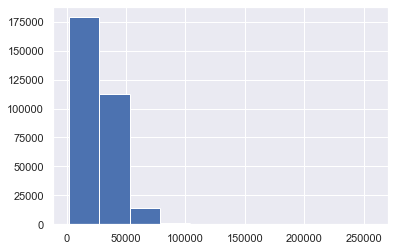

In [5]:
app_train['AMT_ANNUITY'].describe()
app_train['AMT_ANNUITY'].hist()
app_train1 = app_train
bins = [0,20000,40000,60000,80000,100000,258025]
app_train1['AMT_ANNUITY_grp'] = pd.cut(app_train1['AMT_ANNUITY'],bins = bins)
app_train1['AMT_ANNUITY_grp'].value_counts()


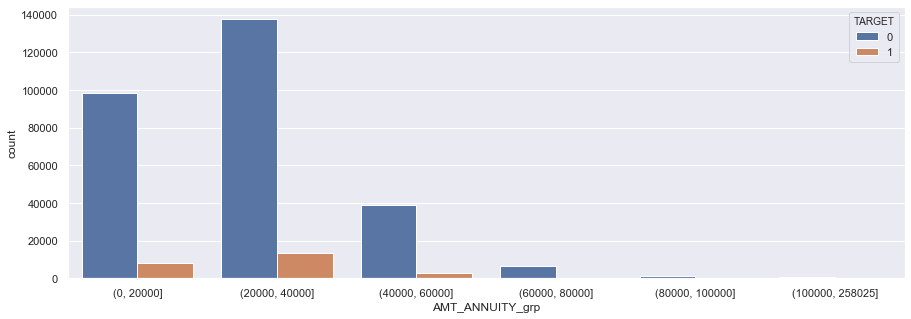

In [10]:
annuity = app_train1[['TARGET','AMT_ANNUITY_grp']]

sns.countplot(x = 'AMT_ANNUITY_grp',hue = 'TARGET',data=annuity)

分散後可以發現loans annuity 40000以下包含最多資料，前兩組的違約數量直觀看來較多，但也有可能是因為包含數量較多導致的，所以要看mean在做判斷

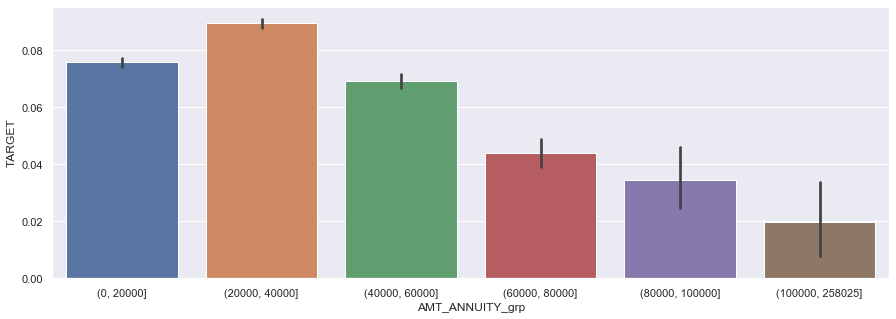

In [11]:
sns.barplot(x = 'AMT_ANNUITY_grp',y = 'TARGET',data=annuity)

一年的loan annuity 在20000-40000這組違約率最高

In [13]:
app_train['AMT_GOODS_PRICE'].describe()


count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

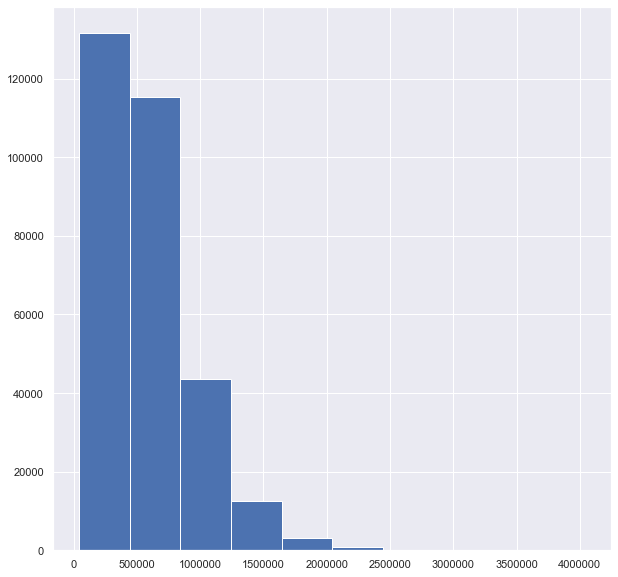

In [14]:
app_train['AMT_GOODS_PRICE'].hist(figsize=(10,10))

In [15]:
grp = [0,99999,999999,2000000,np.inf]
app_train['AMT_GOODS_PRICE_grp'] = pd.cut(app_train['AMT_GOODS_PRICE'],bins = grp,labels =['below 100K','between 100K and 1M','1M-2M','higher than 2M'] )
goods = app_train[['AMT_GOODS_PRICE_grp','TARGET']]

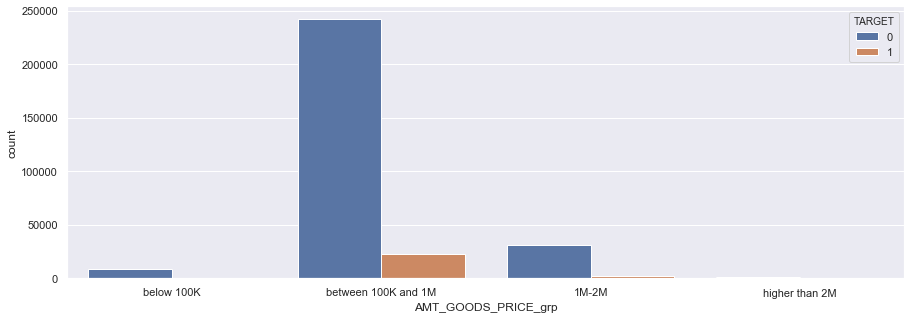

In [16]:
sns.countplot(x = 'AMT_GOODS_PRICE_grp',hue='TARGET',data=goods)


與上圖差不多，10萬到100萬之間的違約數多，但是整體資料量也比其他組多，所以一樣要看平均值

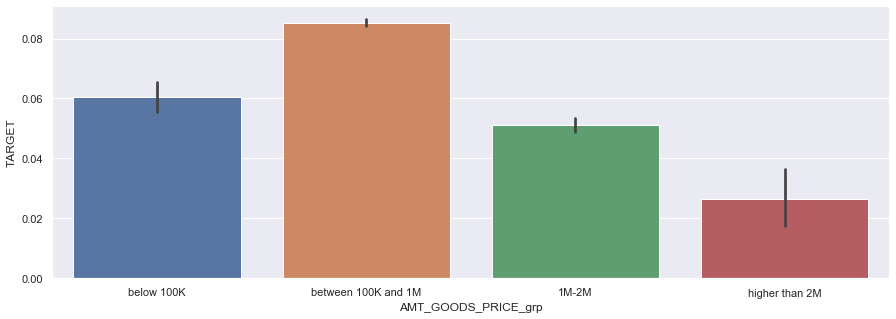

In [17]:
sns.barplot(x = 'AMT_GOODS_PRICE_grp',y='TARGET',data=goods)

第二組違約平均值為最多，所以並不代表買東西越貴越容易違約